In [1]:
%precision 2

'%.2f'

<div class="alert alert-block alert-warning">
1. Implemente o Algoritmo A*, usando a Busca em Largura como modelo e usando uma fila de prioridade para a fronteira. Será necessário usar uma implementação de fila de prioridade; existe uma no repositório da disciplina (referência abaixo).
</div>

In [2]:
import numpy as np
import random
from queue import PriorityQueue

maze = [["S", ".", ".", "#", ".", ".", "."],
        [".", "#", ".", ".", ".", "#", "."],
        [".", "#", ".", ".", ".", ".", "."],
        [".", ".", "#", "#", ".", ".", "."],
        ["#", ".", "#", "E", ".", "#", "."]]
        #S = Start, E = End, # = Rock, . = Empty
        #E = (4, 3)
        
def print_location_in_maze(maze, location, path, emoji=False):
    '''
    Função que imprime o labirinto com a localização atual do personagem.
    '''
    print("•───────────•✤•───────────•")
    print("")
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if i == location[0] and j == location[1]:
                if emoji:
                    print("👾", end=" ")
                else:
                    print("P", end=" ")
            else:
                if emoji:
                    if maze[i][j] == "#":
                        print("⬛", end=" ")
                    elif maze[i][j] == "S":
                        print("🟩", end=" ")
                    elif maze[i][j] == "E":
                        print("🟥", end=" ")
                    #Check if the current location is in the path
                    elif [i, j] in path:
                        print("🟦", end=" ")
                    else:
                        print("⬜", end=" ")
                else:
                    if [i, j] in path:
                        print("X", end=" ")
                    
        print("")
    print("•───────────•✤•───────────•")
    
def print_a_star_path(maze, path):
    for idx, (key, value) in enumerate(path.items()):
        if idx != len(path):
            print_location_in_maze(maze, value, list(path.values())[:idx], emoji=True)
    print_location_in_maze(maze, list(path.keys())[-1], list(path.values()), emoji=True)
    
def print_dfs_path(maze, path):
    for i in range(len(path)):
        print_location_in_maze(maze, path[i], path[:i], emoji=True)
    
def get_viable_labyrinth_path(maze, algo_path):
    '''
    Função que retorna um caminho válido do labirinto a partir da busca em profundidade.
    '''
    viable_path = []
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algo_path)-1):
        valid_moves = get_valid_moves(maze, ultimo_ponto_de_viabilidade)
        if algo_path[-1-i] in valid_moves:
            ultimo_ponto_de_viabilidade = algo_path[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path
        
def get_adjacent_locations(maze, location):
    '''
    Função que retorna as posições adjacentes à localização atual.
    '''
    adjacent_locations = []
    if location[0] > 0:
        adjacent_locations.append([location[0]-1, location[1]])
    if location[0] < len(maze)-1:
        adjacent_locations.append([location[0]+1, location[1]])
    if location[1] > 0:
        adjacent_locations.append([location[0], location[1]-1])
    if location[1] < len(maze[0])-1:
        adjacent_locations.append([location[0], location[1]+1])
    return adjacent_locations

def get_valid_moves(maze, location):
    '''
    Função que retorna as posições adjacentes à localização atual que não são rochas.
    '''
    adjacent_locations = get_adjacent_locations(maze, location)
    valid_moves = []
    for adjacent_location in adjacent_locations:
        if maze[adjacent_location[0]][adjacent_location[1]] != "#":
            valid_moves.append(adjacent_location)
    return valid_moves

def a_star_for_maze(maze):
    
    def maze_heuristics(point1:list, point2:list): #Manhattan distance
        return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])
    
    ending_point = [0,0]
    starting_point = [0,0]
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    a_star_path = {}
    #F-Score is the sum of the G-Score and the H-Score
    #G-Score is the distance from the starting point to the current point
    #H-Score is the distance from the current point to the ending point
    #intialize g_score for every point in the maze as infinity, except for the starting point
    g_score = np.full((len(maze), len(maze[0])), np.inf)
    f_score = np.full((len(maze), len(maze[0])), np.inf)
    g_score[starting_point[0], starting_point[1]] = 0
    f_score[starting_point[0], starting_point[1]] = maze_heuristics(starting_point, ending_point)
    
    open = PriorityQueue()
    open.put((maze_heuristics(starting_point, ending_point) + 0, maze_heuristics(starting_point, ending_point), starting_point)) #f_score of the start cell, h_cost, cell_position
    
    while not open.empty():
        current_cell = open.get()[2] #Celula com o menor f_score, ou seja, a que está mais próxima do final. Caso haja empate, a que está mais próxima do início
        if current_cell == ending_point:
            break
        for move in get_valid_moves(maze, current_cell):
            tentative_g_score = g_score[current_cell[0], current_cell[1]] + 1
            if tentative_g_score < g_score[move[0], move[1]]:
                g_score[move[0], move[1]] = tentative_g_score
                f_score[move[0], move[1]] = tentative_g_score + maze_heuristics(move, ending_point)
                open.put((f_score[move[0], move[1]], maze_heuristics(move, ending_point), move))
                a_star_path[tuple(move)] = tuple(current_cell)

    if len(list(a_star_path)) == 0:
        return False
    if list(a_star_path)[-1] != tuple(ending_point):
        return False
    final_path = {}
    cell = (ending_point[0], ending_point[1])
    while cell != (starting_point[0], starting_point[1]):
        final_path[cell] = list(a_star_path[cell])
        cell = a_star_path[cell]
        
    #Reverse the order of the entries in the dictionary
    final_path = {k: final_path[k] for k in list(final_path.keys())[::-1]}
    return final_path

def labyrinth_dfs(maze, illustrate=False):
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    pilha = [starting_point]
    algoritmo = []
    while pilha:
        location = pilha.pop()
        algoritmo.append(location)
        if illustrate:
            print_location_in_maze(maze, location, algoritmo, emoji=True)
        if ending_point in get_valid_moves(maze, location):
            algoritmo.append(ending_point)
            if illustrate:
                print_location_in_maze(maze, ending_point, algoritmo, emoji=True)
            return algoritmo
        valid_moves = get_valid_moves(maze, location)
        random.shuffle(valid_moves)
        for move in valid_moves:
            if move not in algoritmo and move not in pilha:
                pilha.append(move)
    return False

In [3]:
path = a_star_for_maze(maze)
print_a_star_path(maze, path)

•───────────•✤•───────────•

👾 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 👾 ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 👾 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 👾 ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 👾 ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 🟦 ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ 👾 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 🟦 ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ 🟦 👾 ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 🟦 ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ 🟦 🟦 ⬜ ⬜ 
⬜ 

In [4]:
x_size = 20
y_size = 20
starting_point = [0,0]
ending_point = [x_size-1, y_size-1]
viable_maze_dfs_algo = False
while not viable_maze_dfs_algo:
    maze_dfs = []
    for i in range(x_size):
        maze_dfs.append([])
        for j in range(y_size):
            if i == starting_point[0] and j == starting_point[1]:
                maze_dfs[i].append("S")
            elif i == ending_point[0] and j == ending_point[1]:
                maze_dfs[i].append("E")
            else:
                if random.randint(0,1) == 0:
                    maze_dfs[i].append(".")
                else:
                    maze_dfs[i].append("#")
    viable_maze_dfs_algo = labyrinth_dfs(maze_dfs) #Retorna verdadeiro quando é gerado um labirinto resolvivel
    
viable_path_dfs = get_viable_labyrinth_path(maze_dfs, viable_maze_dfs_algo)
print_dfs_path(maze_dfs, viable_path_dfs)

•───────────•✤•───────────•

👾 ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ 
⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ 
⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬛ 
⬜ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ 
⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ 
⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ 
⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ 
⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ 
⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ ⬜ 
⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ 
⬛ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ 
⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ 
⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ 🟥 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 👾 ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬛ ⬜ ⬛ ⬛ 

In [5]:
#Gerar um labirinto aleatório de 20x20
x_size = 20
y_size = 20
starting_point = [0,0]
ending_point = [x_size-1, y_size-1]

viable_maze_a_star_algo = False
while not viable_maze_a_star_algo:
    maze_a_star = []
    for i in range(x_size):
        maze_a_star.append([])
        for j in range(y_size):
            if i == starting_point[0] and j == starting_point[1]:
                maze_a_star[i].append("S")
            elif i == ending_point[0] and j == ending_point[1]:
                maze_a_star[i].append("E")
            else:
                if random.randint(0,1) == 0:
                    maze_a_star[i].append(".")
                else:
                    maze_a_star[i].append("#")
    viable_maze_a_star_algo = a_star_for_maze(maze_a_star) #Retorna verdadeiro quando é gerado um labirinto resolvivel

print_a_star_path(maze_a_star, viable_maze_a_star_algo)

•───────────•✤•───────────•

👾 ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ 
⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ 
⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ 
⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ 
⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ 
⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ 
⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ 
⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ 
⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬛ ⬛ 
⬛ ⬛ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬜ ⬛ ⬜ 
⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬛ ⬛ ⬛ ⬜ ⬛ ⬛ ⬜ 
⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ ⬜ 🟥 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 👾 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ ⬛ 
⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬛ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ ⬛ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ 

In [6]:
len(a_star_for_maze(maze_dfs))

38

In [7]:
len(get_viable_labyrinth_path(maze_dfs, labyrinth_dfs(maze_dfs)))

41

In [8]:
len(a_star_for_maze(maze_a_star))

44

In [9]:
len(get_viable_labyrinth_path(maze_a_star, labyrinth_dfs(maze_a_star)))

53

<div class="alert alert-block alert-warning">
2. Usando a implementação do A* desenvolvida para a questão anterior, resolva o problema de busca de rotas na Romênia (de Arad a Bucareste), usando os dados do livro (incluindo a função heurística). Mostre o passo a passo da solução.
</div>

In [10]:
import numpy as np
from queue import PriorityQueue
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

def acao(destino, custo):
    return {"destino": destino, "custo": custo}

estados_romenia = [
    {"estado": "Arad", "acoes": [acao("Zerind", 75), acao("Sibiu", 140), acao("Timisoara", 118)]},
    {"estado": "Zerind", "acoes": [acao("Arad", 75), acao("Oradea", 71)]},
    {"estado": "Timisoara", "acoes": [acao("Arad", 118), acao("Lugoj", 111)]},
    {"estado": "Sibiu","acoes": [acao("Arad", 140), acao("Oradea", 151), acao("Fagaras", 99), acao("Rimnicu Vilcea", 80)]},
    {"estado": "Oradea", "acoes": [acao("Zerind", 71), acao("Sibiu", 151)]},
    {"estado": "Lugoj", "acoes": [acao("Timisoara", 111), acao("Mehadia", 70)]},
    {"estado": "Mehadia", "acoes": [acao("Lugoj", 70), acao("Drobeta", 75)]},
    {"estado": "Drobeta", "acoes": [acao("Mehadia", 75), acao("Craiova", 120)]},
    {"estado": "Craiova", "acoes": [acao("Drobeta", 120), acao("Rimnicu Vilcea", 146), acao("Pitesti", 138)]},
    {"estado": "Rimnicu Vilcea", "acoes": [acao("Sibiu", 80), acao("Craiova", 146), acao("Pitesti", 97)]},
    {"estado": "Fagaras", "acoes": [acao("Sibiu", 99), acao("Bucharest", 211)]},
    {"estado": "Pitesti", "acoes": [acao("Rimnicu Vilcea", 97), acao("Craiova", 138), acao("Bucharest", 101)]},
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 90)]},
    {"estado": "Bucharest", "acoes": [acao("Fagaras", 211), acao("Pitesti", 101), acao("Giurgiu", 90), acao("Urziceni", 85)]},
    {"estado": "Urziceni", "acoes": [acao("Bucharest", 85), acao("Vaslui", 142), acao("Hirsova", 98)]},
    {"estado": "Hirsova", "acoes": [acao("Urziceni", 98), acao("Eforie", 86)]},
    {"estado": "Eforie", "acoes": [acao("Hirsova", 86)]},
    {"estado": "Vaslui", "acoes": [acao("Urziceni", 142), acao("Iasi", 92)]},
    {"estado": "Iasi", "acoes": [acao("Vaslui", 92), acao("Neamt", 87)]},
    {"estado": "Neamt", "acoes": [acao("Iasi", 87)]}
]

def get_estado(estado):
    for e in estados_romenia:
        if e["estado"] == estado:
            return e
    return None

def get_all_acoes(estado):
    return get_estado(estado)['acoes']

def get_custo(estado, destino):
    for acao in get_all_acoes(estado):
        if acao["destino"] == destino:
            return acao["custo"]
    return False

def get_custo_total(percurso):
    custo_total = 0
    for i in range(len(percurso)-1):
        custo_total += get_custo(percurso[i], percurso[i+1])
    return custo_total

def get_all_destinos(estado):
    destinos = []
    for acao in get_all_acoes(estado):
        destinos.append(acao["destino"])
    return destinos

def highlight_path(algoritmo, cost, viable_path):
    '''
    Função que desenha o grafo com os estados da Bulgária, o caminho percorrido pelo algoritmo até o ponto final, e um possível caminho viável.
    O custo se dá pelo somatório do custo de deslocamento para cada par de estados do possível caminho viável.
    '''
    G = nx.Graph()
    for estado in estados_romenia:
        for acao in estado["acoes"]:
            G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=300, node_color='skyblue', font_size=8,
    width=1, edge_color='black', alpha=1, arrows=True, arrowstyle='-',  arrowsize=10,
    connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1,
    linewidths=1, label='Romenia', font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
    #increase the size of the graph
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    fig.set_dpi(300)

    plt.text(-0.00, 0.99, f"Vermelho: Estados visitados pelo algoritmo\nVerde: Rota viável", fontsize=5, bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    for estado in algoritmo:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=300, alpha=1)
        #Put numbers on top of the nodes according to the order they were visited
        plt.text(pos[estado][0]*1, pos[estado][1]-0.05, str(algoritmo.index(estado)), fontsize=5, fontweight='bold', color='white', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='red'), pe.Normal()])
    #Draw a square on the corner of the graph to show the cost
    for estado in viable_path:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='green', node_size=300, alpha=1)
        plt.text(pos[estado][0]*1, pos[estado][1]+0.05, str(viable_path.index(estado)), fontsize=5, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='green')],
        )

    plt.title(f"Custo total da rota viável: {cost}", fontsize=5, fontweight='bold', color='black', loc='left', horizontalalignment='left', verticalalignment='center')
    

def create_heuristic_table():
    '''
    Should return a dictionary with the heuristic values for each state
    '''
    h = {}
    distance_to_bucharest ='''
    Arad, 366
    Bucharest, 0
    Craiova, 160
    Dobreta, 242
    Eforie, 161
    Fagaras, 176
    Giurgiu, 77
    Hirsowa, 151
    Iasi, 226
    Lugoj, 244
    Mehadia, 241
    Neamt, 234
    Oradea, 380
    Pitesti, 100
    Rimnicu Vilcea, 193
    Sibiu, 253
    Timisoara, 329
    Urziceni, 80
    Vaslui, 199
    Zerind, 374
    '''
    for line in distance_to_bucharest.splitlines():
        if line.strip():
            city, distance = line.split(",")
            h[city.strip()] = int(distance)
    return h

def heuristic(city, values):
    return values[city]


def a_star_romenia(start, goal, illustrate=False, current_heuristic="default"):
    a_star_path = {}
    distance = {}
    if current_heuristic == "default":
        h = create_heuristic_table()
    else:
        h = current_heuristic
    distance[start] = 0
    a_star_path[start] = None
    expanded = []
    
    open = PriorityQueue()
    open.put((0, start))
    
    while not open.empty():
        current = open.get()[1]
        expanded.append(current)
        
        if current == goal:
            break
        for action in get_all_acoes(current):
            temp_g_score = distance[current] + action["custo"]
            if action["destino"] not in distance or temp_g_score < distance[action["destino"]]:
                distance[action["destino"]] = temp_g_score
                open.put((temp_g_score + heuristic(action["destino"], h), action["destino"]))
                a_star_path[action["destino"]] = current
        open.queue.sort()
        if illustrate:
            print("Cidade atual: ", current)
            print("Cidades expandidas: ", expanded)
            print("Cidades na fila: ", open.queue)
            print("Próxima cidade a ser expandida: ", open.queue[0][1])
            print("End of iteration\n\n")
            
                
    viable_path = {}
    city = goal
    while city != start:
        viable_path[city] = a_star_path[city]
        city = a_star_path[city]
        
    #Reverse the final path
    viable_path = {k: viable_path[k] for k in list(viable_path.keys())[::-1]}

    viable_path = [start] + list(viable_path.keys())
    return a_star_path, expanded, distance, viable_path
 
 

In [11]:
a_star_arad_bucharest = a_star_romenia("Arad", "Bucharest", illustrate=True)

Cidade atual:  Arad
Cidades expandidas:  ['Arad']
Cidades na fila:  [(393, 'Sibiu'), (447, 'Timisoara'), (449, 'Zerind')]
Próxima cidade a ser expandida:  Sibiu
End of iteration


Cidade atual:  Sibiu
Cidades expandidas:  ['Arad', 'Sibiu']
Cidades na fila:  [(413, 'Rimnicu Vilcea'), (415, 'Fagaras'), (447, 'Timisoara'), (449, 'Zerind'), (671, 'Oradea')]
Próxima cidade a ser expandida:  Rimnicu Vilcea
End of iteration


Cidade atual:  Rimnicu Vilcea
Cidades expandidas:  ['Arad', 'Sibiu', 'Rimnicu Vilcea']
Cidades na fila:  [(415, 'Fagaras'), (417, 'Pitesti'), (447, 'Timisoara'), (449, 'Zerind'), (526, 'Craiova'), (671, 'Oradea')]
Próxima cidade a ser expandida:  Fagaras
End of iteration


Cidade atual:  Fagaras
Cidades expandidas:  ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Fagaras']
Cidades na fila:  [(417, 'Pitesti'), (447, 'Timisoara'), (449, 'Zerind'), (450, 'Bucharest'), (526, 'Craiova'), (671, 'Oradea')]
Próxima cidade a ser expandida:  Pitesti
End of iteration


Cidade atual:  Pitesti


In [12]:
a_star_arad_bucharest

({'Arad': None,
  'Zerind': 'Arad',
  'Sibiu': 'Arad',
  'Timisoara': 'Arad',
  'Oradea': 'Sibiu',
  'Fagaras': 'Sibiu',
  'Rimnicu Vilcea': 'Sibiu',
  'Craiova': 'Rimnicu Vilcea',
  'Pitesti': 'Rimnicu Vilcea',
  'Bucharest': 'Pitesti'},
 ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Fagaras', 'Pitesti', 'Bucharest'],
 {'Arad': 0,
  'Zerind': 75,
  'Sibiu': 140,
  'Timisoara': 118,
  'Oradea': 291,
  'Fagaras': 239,
  'Rimnicu Vilcea': 220,
  'Craiova': 366,
  'Pitesti': 317,
  'Bucharest': 418},
 ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest'])

<div class="alert alert-block alert-info">
O algoritmo começa explorando todos as cidades que estão conectados diretamente à <b>Arad</b>, e escolhe a cidade que possuí o menor custo de deslocamento (que é a soma dos custos de deslocamento da cidade que está sendo observada até <b>Arad</b>, e da cidade que está sendo observada até <b>Bucharest</b>).
Então, a fila da cidades possíveis serem consideradas fica, primeiramente assim: <code style="background:black;color:white">Timisioara (449) -> Zerind (447) -> Sibiu (393)</code>
O algoritmo então decide ir para a cidade que tem o menor custo (Sibiu), e explorar as cidades que estão conectadas à ela. <code style="background:black;color:white">Oradea (671) -> Timisioara (449) -> Zerind (447) -> Fagaras(415) -> Rimnicu Vilcea (413) </code>

A mesma decisão mostrada acima é repetida ficando a fila de prioridade na seguinte maneira:<code style="background:black;color:white">Oradea (671) -> Sibiu -> Craiova (526) -> Timisioara (449) -> Zerind (447) -> Pitesti (417) -> Fagaras (415)</code>.


Como a próxima cidade com o menor custo é Fagaras, então o algoritmo volta para Fagaras para tentar visualizar se há um caminho mais eficiente: <code style="background:black;color:white">Oradea (671) -> Sibiu -> Craiova (526) -> Timisioara (449) -> Bucharest (450) -> Zerind (447) -> Pitesti (417)</code>.


Apesar de <b>Bucharest já ter aparecido na nossa fila não iremos visitá-lo agora pois há a possibilidade de se encontrar um caminho mais eficiente por Pitesti ou Zerind</b>, então o estado da fila sera: <code style="background:black;color:white">Oradea (671) -> Sibiu -> Craiova (526) -> Timisioara (449) -> Bucharest (450) -> Zerind (447) -> Bucharest(418)</code>.

</div>

Como Bucharest é o nosso destino final, e está em primeiro lugar na lista de prioridade o algoritmo aceita isso como solução, então é feito um backtrack para recuperar o caminho que levou até Bucharest com custo total de 418

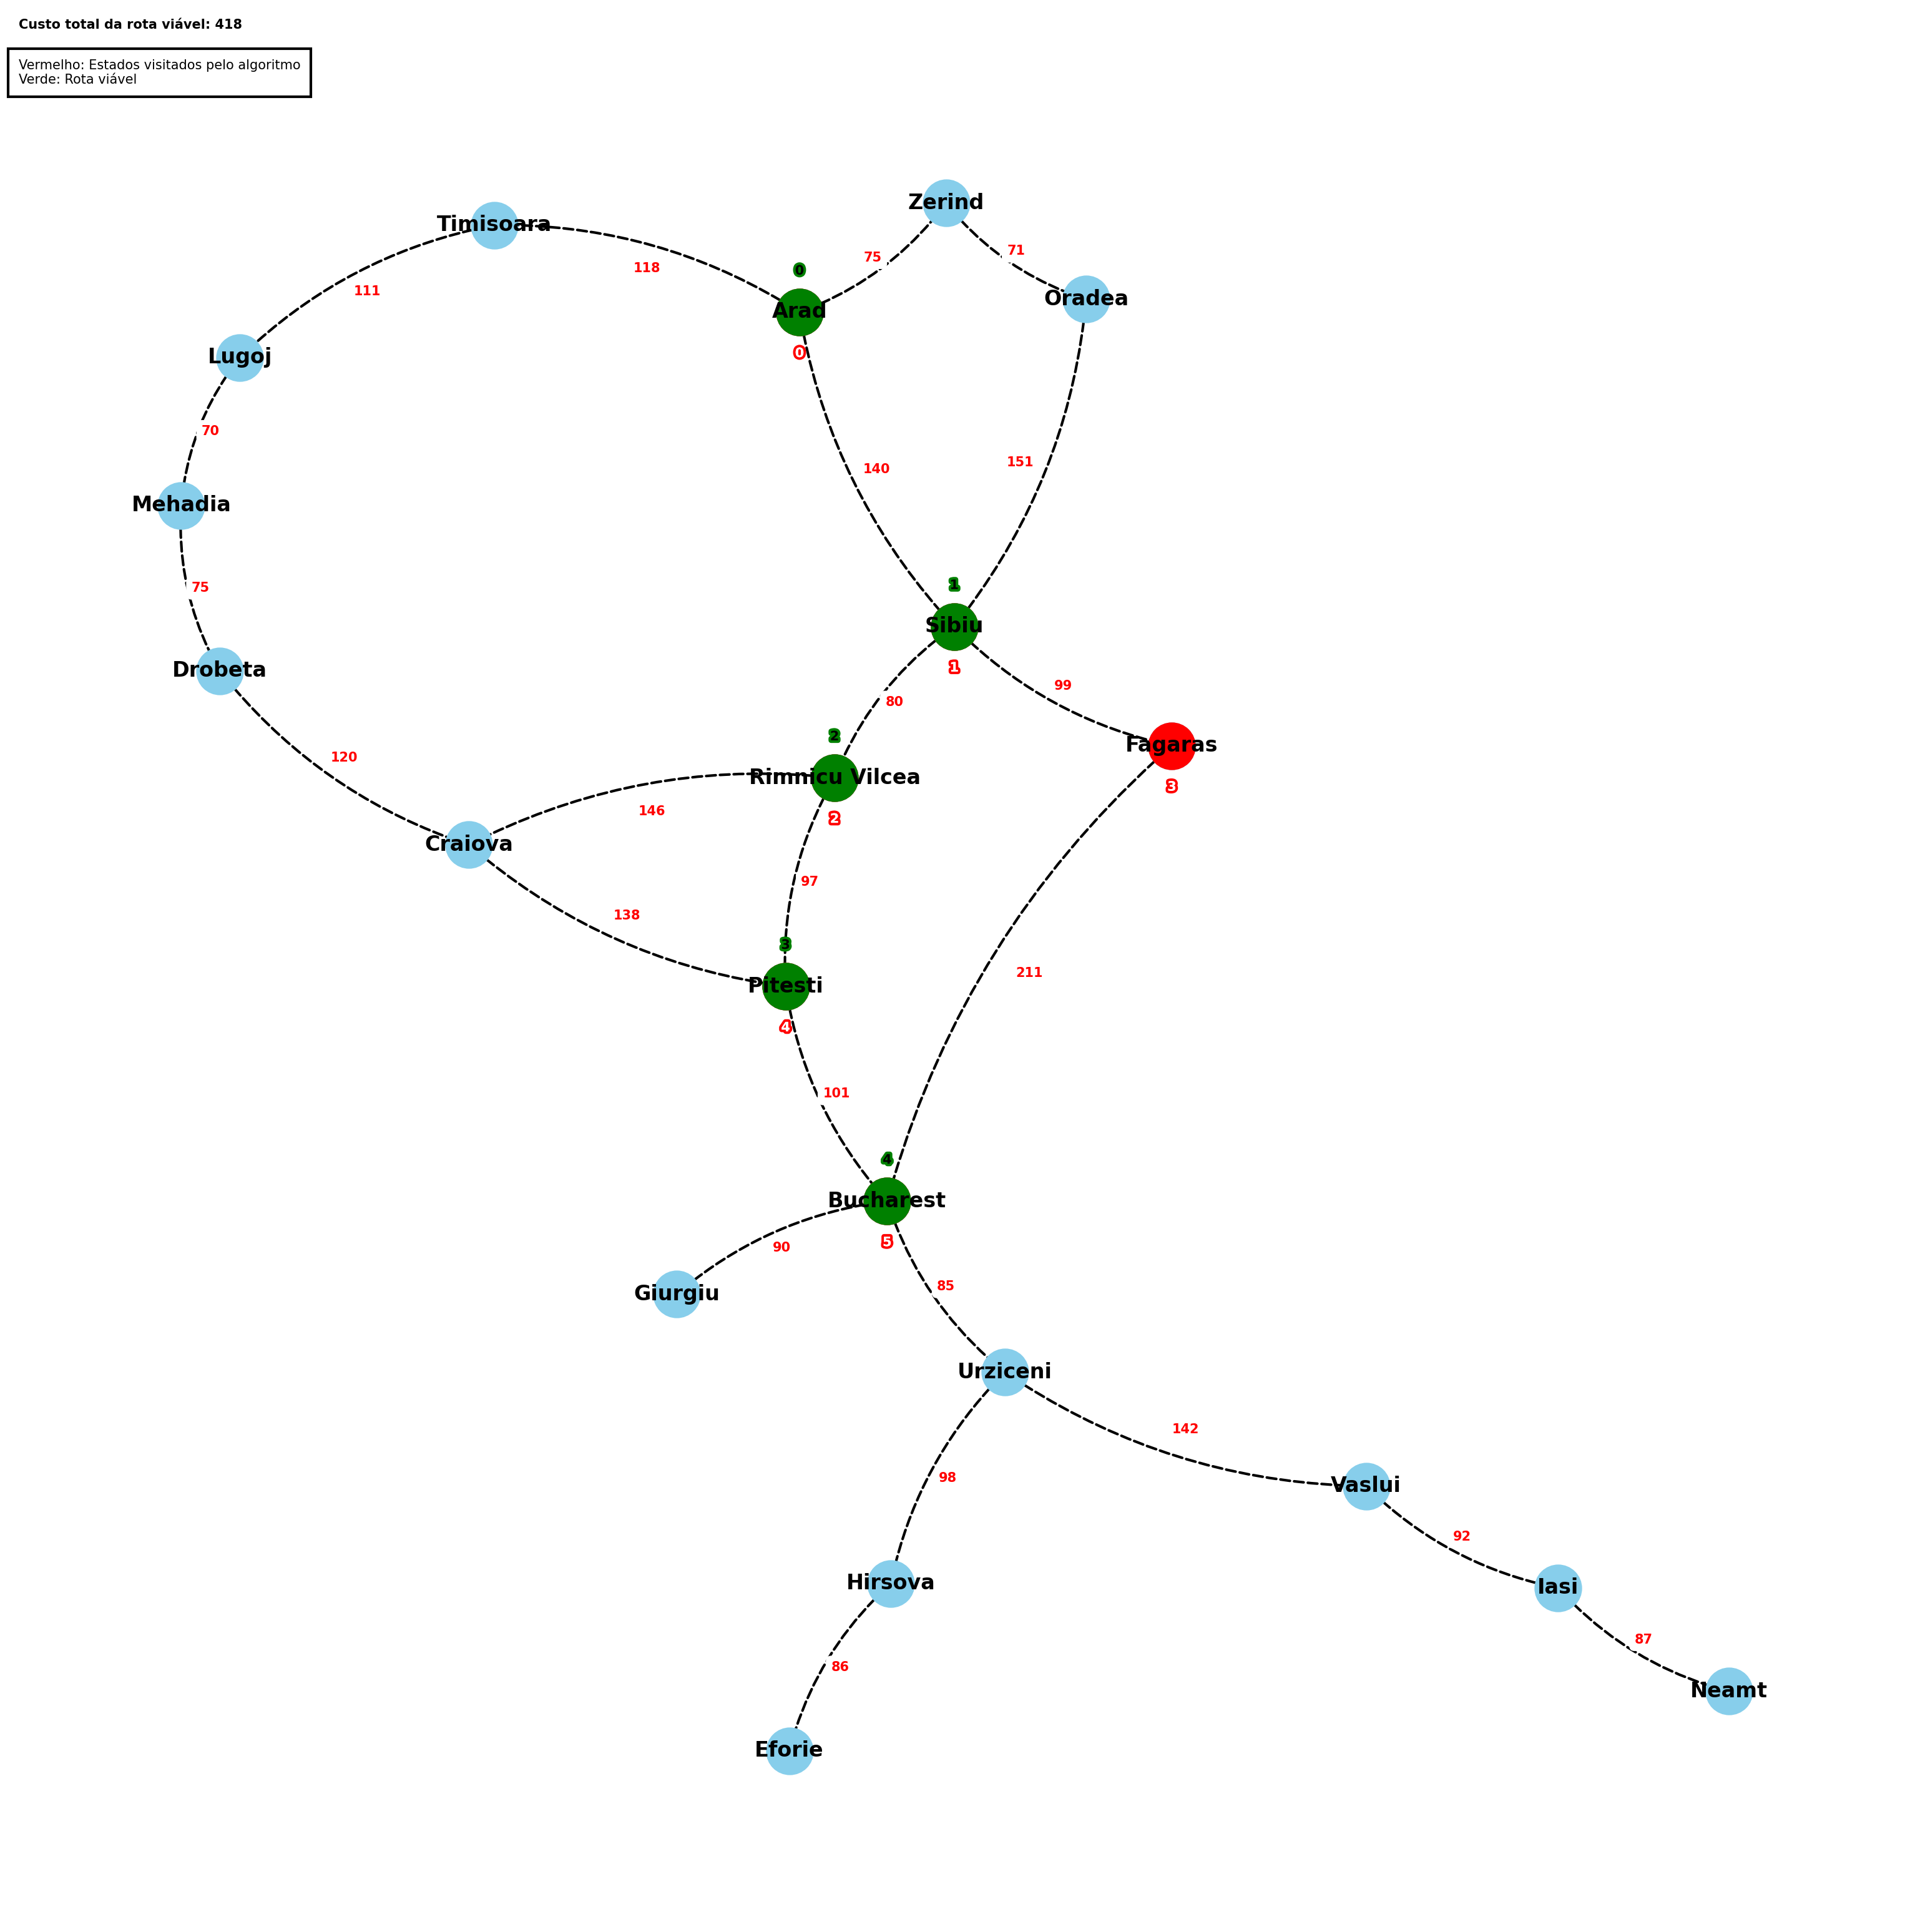

In [13]:
highlight_path(a_star_arad_bucharest[1], get_custo_total(a_star_arad_bucharest[3]), a_star_arad_bucharest[3])

<div class="alert alert-block alert-warning">
3. A função heurística mostrada no livro (e nos vídeos) não pode ser utilizada para buscar a
rota até outras cidades de destino na Romênia (tem que ser Bucareste), mas pode ser
usada na busca de rotas mudando a cidade de origem (ao invés de Arad). Proponha e
simule a busca de rotas de pelo menos duas outras cidades até Bucareste. Mostre o passo
a passo do algoritmo buscando a solução.</div>

In [14]:
a_star_zerind_bucharest = a_star_romenia("Zerind", "Bucharest", illustrate=True)

Cidade atual:  Zerind
Cidades expandidas:  ['Zerind']
Cidades na fila:  [(441, 'Arad'), (451, 'Oradea')]
Próxima cidade a ser expandida:  Arad
End of iteration


Cidade atual:  Arad
Cidades expandidas:  ['Zerind', 'Arad']
Cidades na fila:  [(451, 'Oradea'), (468, 'Sibiu'), (522, 'Timisoara')]
Próxima cidade a ser expandida:  Oradea
End of iteration


Cidade atual:  Oradea
Cidades expandidas:  ['Zerind', 'Arad', 'Oradea']
Cidades na fila:  [(468, 'Sibiu'), (522, 'Timisoara')]
Próxima cidade a ser expandida:  Sibiu
End of iteration


Cidade atual:  Sibiu
Cidades expandidas:  ['Zerind', 'Arad', 'Oradea', 'Sibiu']
Cidades na fila:  [(488, 'Rimnicu Vilcea'), (490, 'Fagaras'), (522, 'Timisoara')]
Próxima cidade a ser expandida:  Rimnicu Vilcea
End of iteration


Cidade atual:  Rimnicu Vilcea
Cidades expandidas:  ['Zerind', 'Arad', 'Oradea', 'Sibiu', 'Rimnicu Vilcea']
Cidades na fila:  [(490, 'Fagaras'), (492, 'Pitesti'), (522, 'Timisoara'), (601, 'Craiova')]
Próxima cidade a ser expandida:  

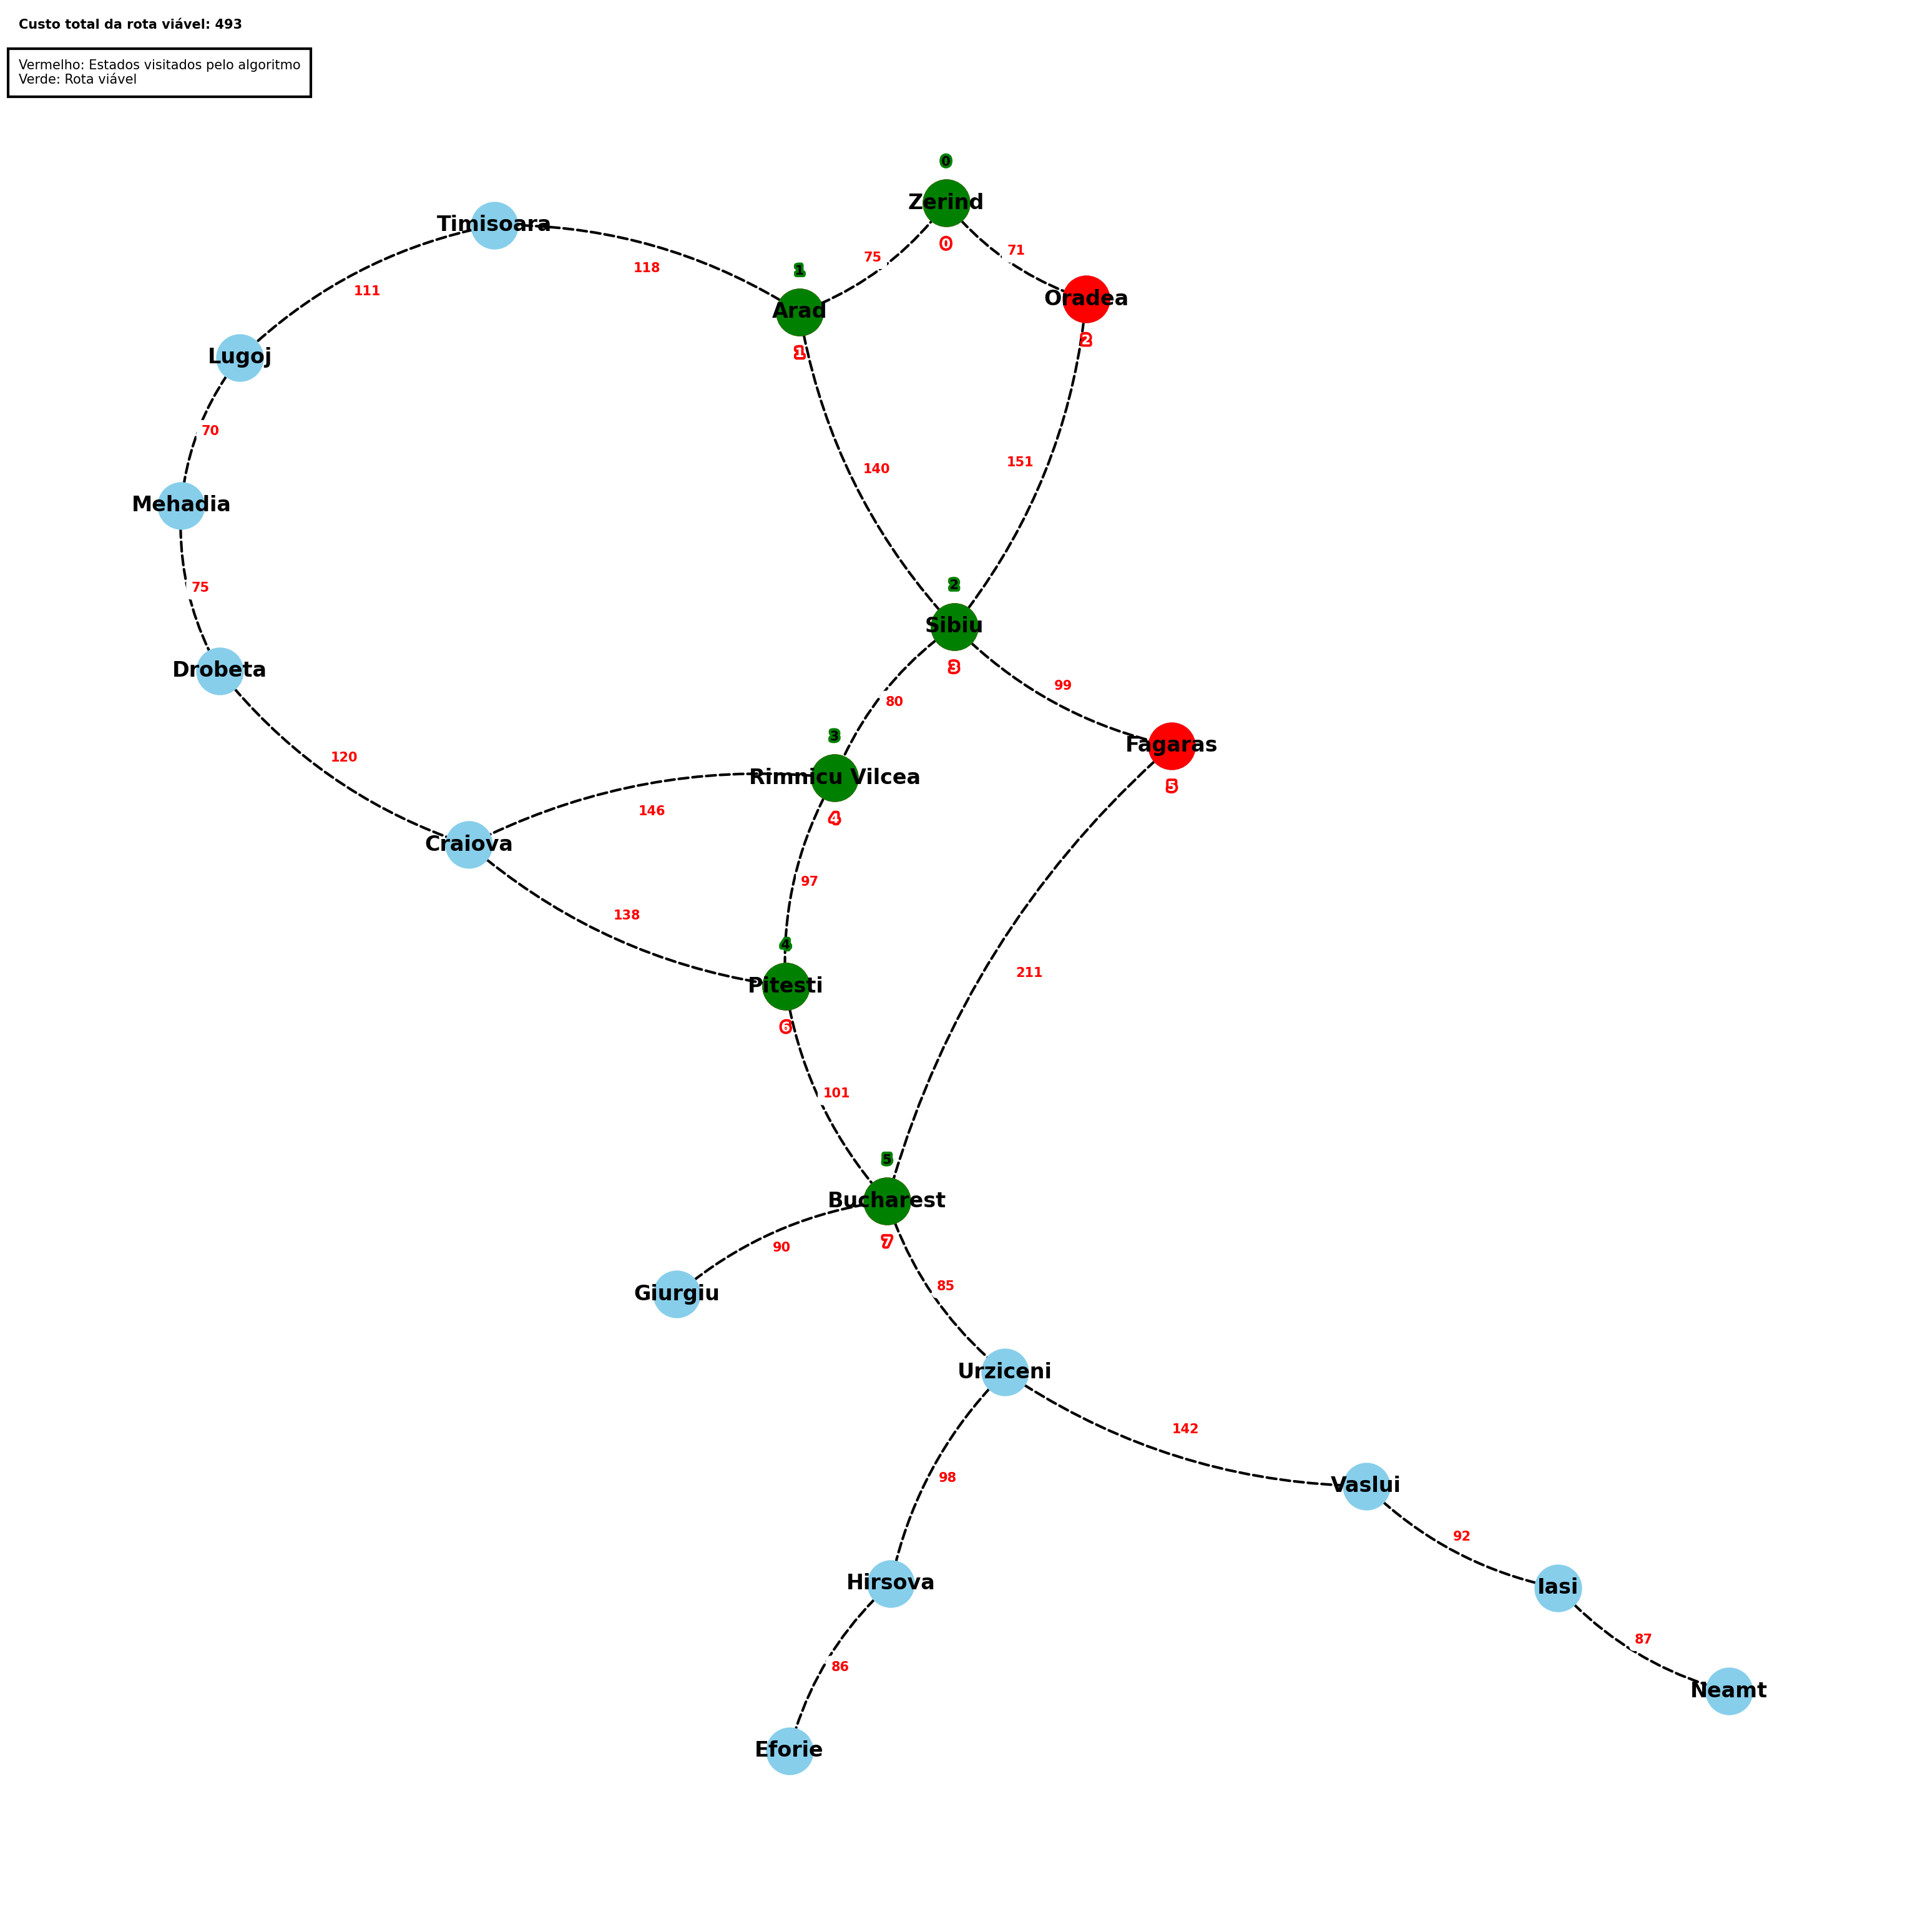

In [15]:
highlight_path(a_star_zerind_bucharest[1], get_custo_total(a_star_zerind_bucharest[3]), a_star_zerind_bucharest[3])

In [16]:
a_star_oradea_bucharest = a_star_romenia("Oradea", "Bucharest", illustrate=True)

Cidade atual:  Oradea
Cidades expandidas:  ['Oradea']
Cidades na fila:  [(404, 'Sibiu'), (445, 'Zerind')]
Próxima cidade a ser expandida:  Sibiu
End of iteration


Cidade atual:  Sibiu
Cidades expandidas:  ['Oradea', 'Sibiu']
Cidades na fila:  [(424, 'Rimnicu Vilcea'), (426, 'Fagaras'), (445, 'Zerind'), (657, 'Arad')]
Próxima cidade a ser expandida:  Rimnicu Vilcea
End of iteration


Cidade atual:  Rimnicu Vilcea
Cidades expandidas:  ['Oradea', 'Sibiu', 'Rimnicu Vilcea']
Cidades na fila:  [(426, 'Fagaras'), (428, 'Pitesti'), (445, 'Zerind'), (537, 'Craiova'), (657, 'Arad')]
Próxima cidade a ser expandida:  Fagaras
End of iteration


Cidade atual:  Fagaras
Cidades expandidas:  ['Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Fagaras']
Cidades na fila:  [(428, 'Pitesti'), (445, 'Zerind'), (461, 'Bucharest'), (537, 'Craiova'), (657, 'Arad')]
Próxima cidade a ser expandida:  Pitesti
End of iteration


Cidade atual:  Pitesti
Cidades expandidas:  ['Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Fagaras', 'Pites

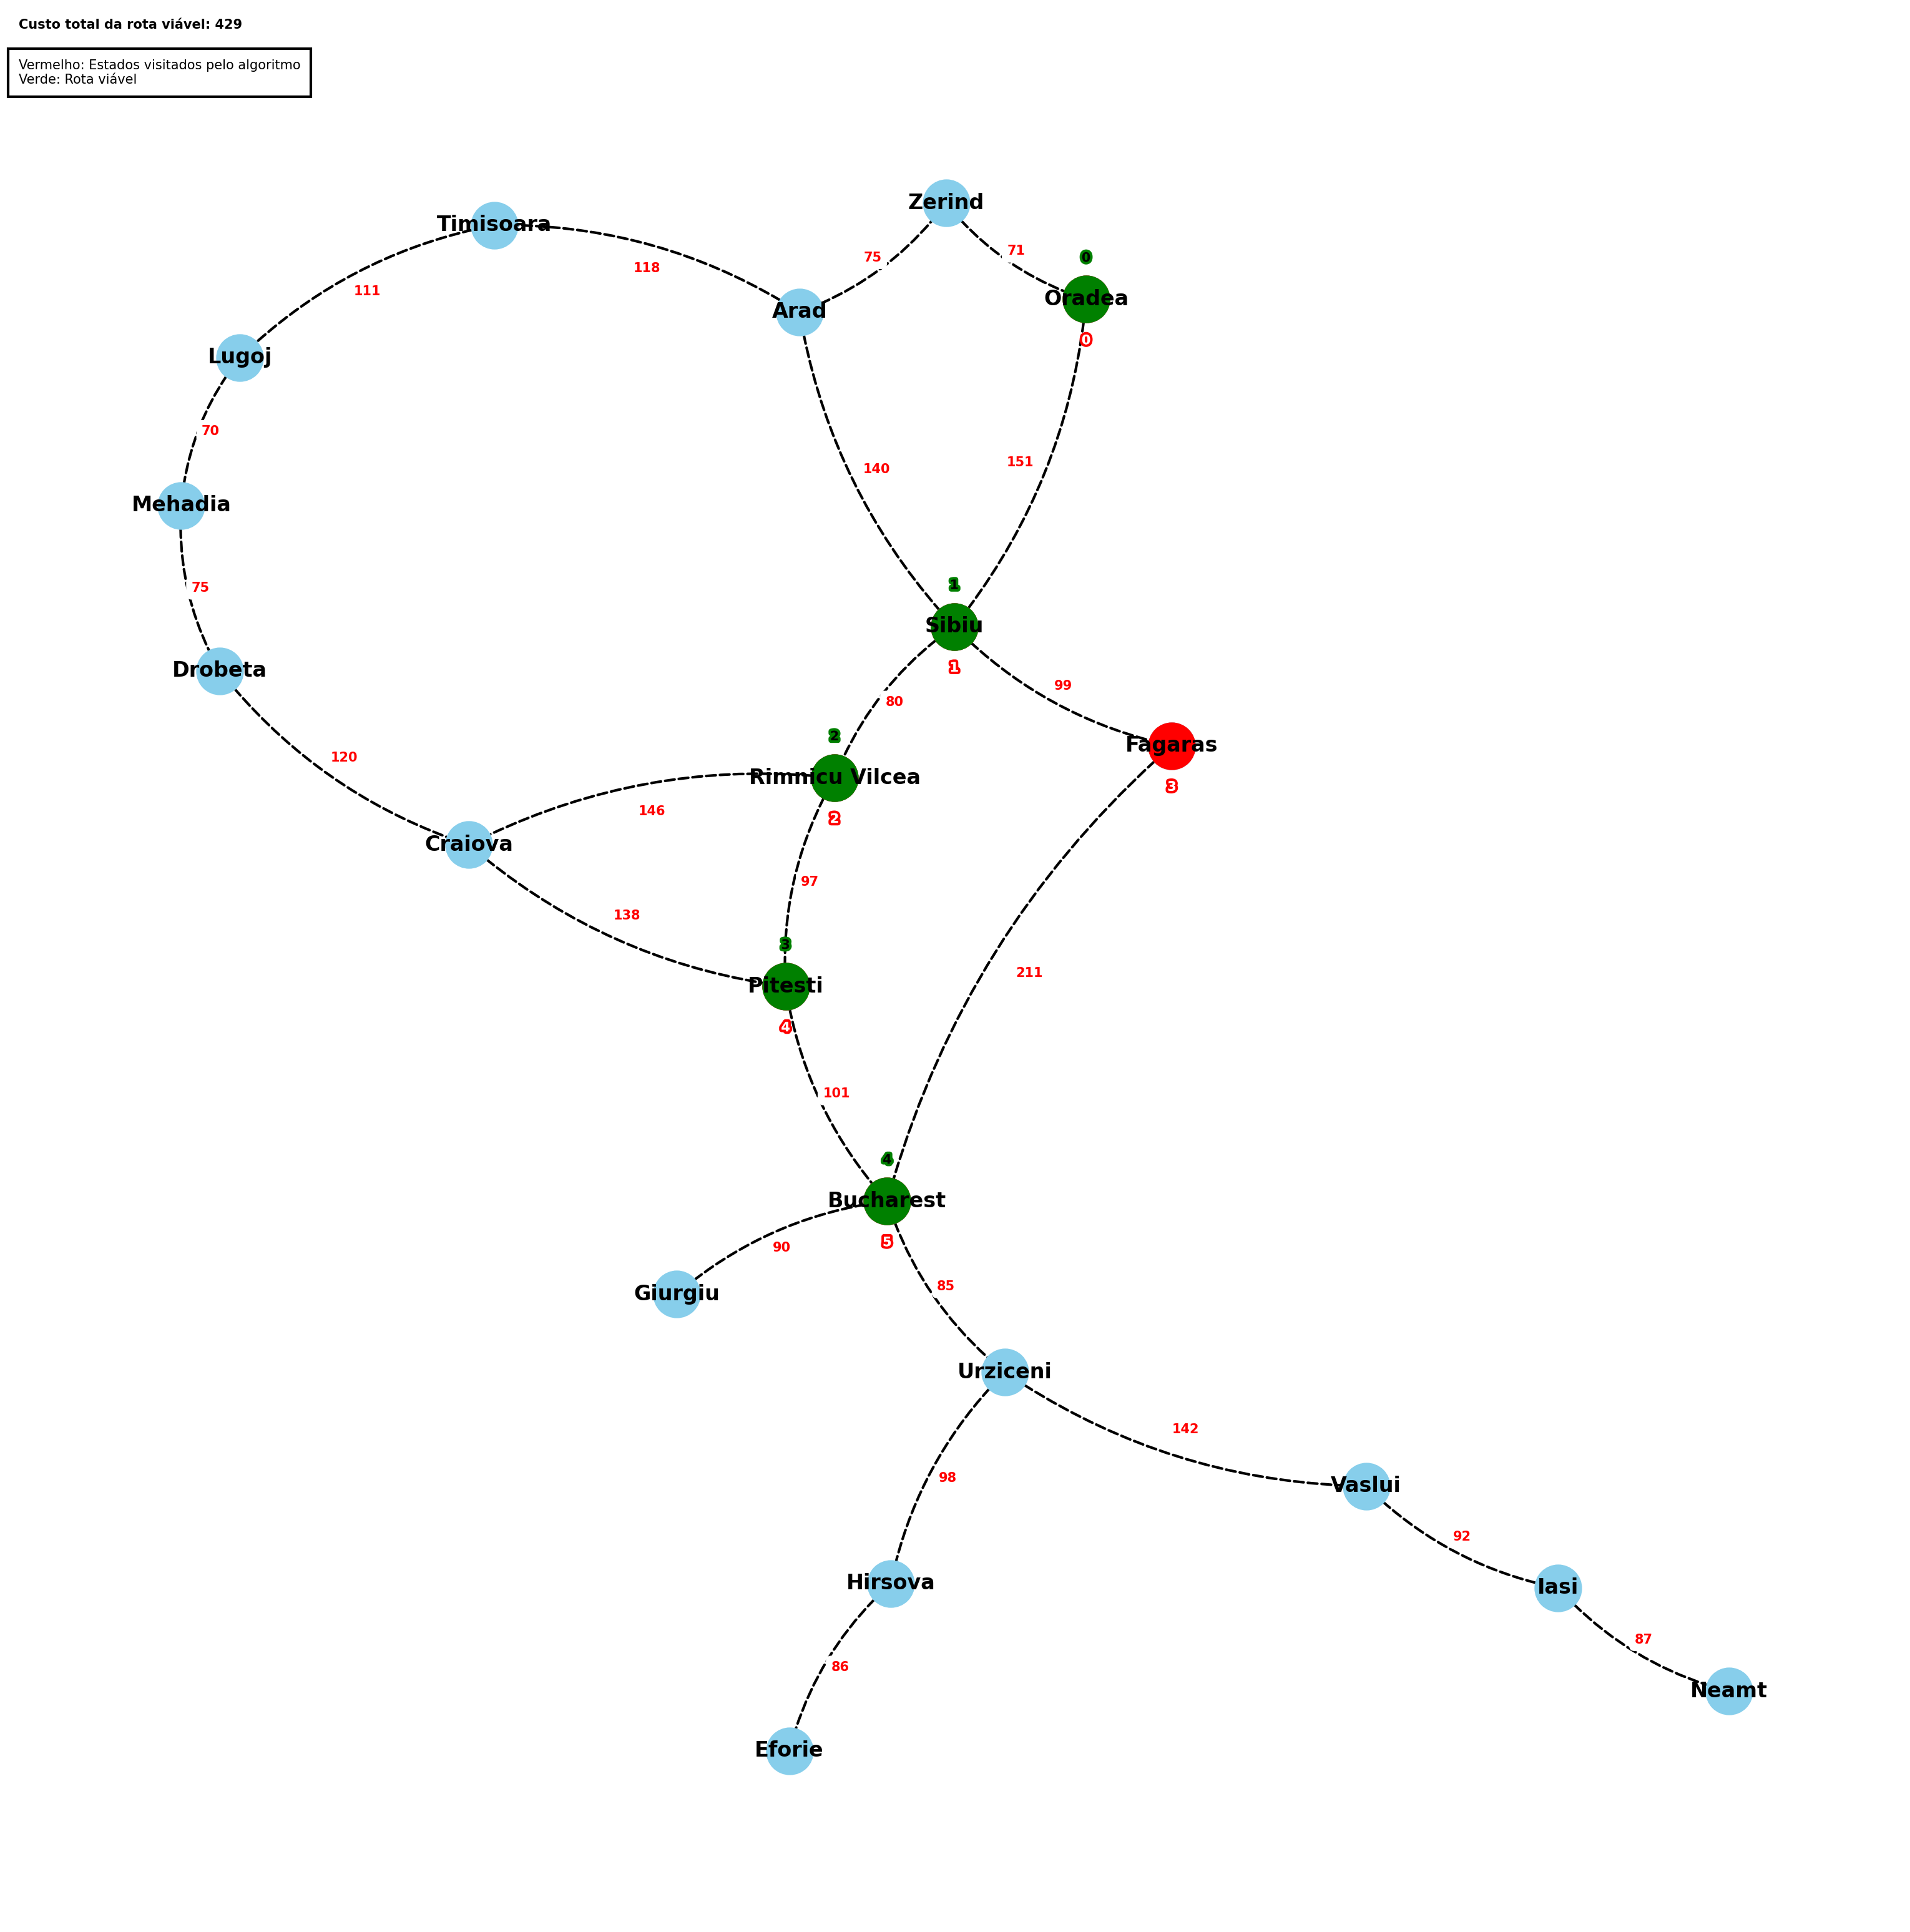

In [17]:
highlight_path(a_star_oradea_bucharest[1], get_custo_total(a_star_oradea_bucharest[3]), a_star_oradea_bucharest[3])

<div class="alert alert-block alert-warning">
    4. (Opcional) Use algum aplicativo de mapas para obter a distância em linha reta, e crie uma
    função heurística para resolver problemas de rotas nas cidades da Romênia tendo outra
    cidade de destino diferente de Bucareste. Resolva algum problema de rota usando a
    função heurística criada, e mostre o passo a passo da busca.
</div>


<div class="alert alert-block alert-info">
Iremos utilizar a localização geográfica real (latitude e longitude) das cidades da Romenia para poder determinar a distância entre as cidades através do cálculo da distância euclidiana
</div>

In [18]:
romenia_loc_x_y = {
    "Arad": (46.1866, 21.3123),
    "Zerind": (46.6225, 21.5172),
    "Timisoara": (45.7597, 21.2379),
    "Sibiu": (45.7975, 24.1256),
    "Oradea": (47.0568, 21.9182),
    "Lugoj": (45.6909, 21.9035),
    "Mehadia": (44.9041, 22.3642),
    "Drobeta": (44.6369, 22.6564),
    "Craiova": (44.3302, 23.7949),
    "Rimnicu Vilcea": (45.0997, 24.3699),
    "Fagaras": (45.8416, 24.9731),
    "Pitesti": (44.8564, 24.8691),
    "Giurgiu": (43.9037, 25.9699),
    "Bucharest": (44.4268, 26.1025),
    "Urziceni": (44.7165, 26.6411),
    "Hirsova": (44.6896, 27.9457),
    "Eforie": (44.0496, 28.6339),
    "Vaslui": (46.6407, 27.7574),
    "Iasi": (47.1585, 27.6014),
    "Neamt": (46.9759, 26.3814)
}

#transform the dictionary into a list of tuples
romenia_loc_x_y_tuples = list(romenia_loc_x_y.items())

In [19]:
#print in a map the locations in romenia
import folium
romenia_map = folium.Map(location=[46.1866, 21.3123], zoom_start=6)
for city in romenia_loc_x_y:
    folium.Marker(location=romenia_loc_x_y[city], popup=city).add_to(romenia_map)
    
#Não dá pra ver no github, mas se rodar o código, vai ver o mapa

romenia_map

<img src="https://i.imgur.com/hvMlzya.png">

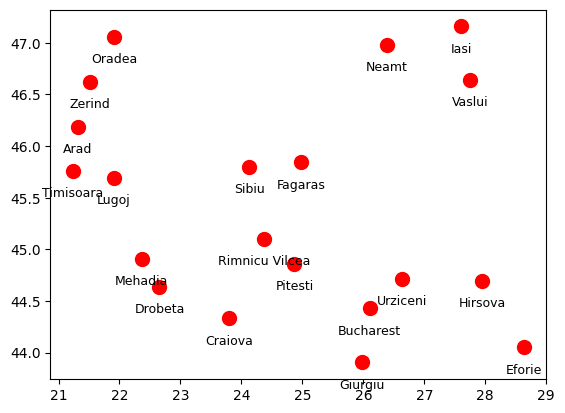

In [20]:
for city in romenia_loc_x_y_tuples:
    plt.scatter(city[1][1], city[1][0], s=100, c='r', marker='o')
    plt.text(city[1][1], city[1][0]-0.25, city[0], fontsize=9, color='black', ha='center')

In [21]:
import math
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

In [22]:
estados_romenia = [
    {
        "estado": "Arad",
        "acoes": [
            acao("Zerind", 0.48),
            acao("Sibiu", 2.84),
            acao("Timisoara", 0.43),
        ],
    },
    {
        "estado": "Zerind",
        "acoes": [
            acao("Arad", 0.48),
            acao("Oradea", 0.59),
        ],
    },
    {
        "estado": "Timisoara",
        "acoes": [acao("Arad", 0.43), acao("Lugoj", 0.66)],
    },
    {
        "estado": "Sibiu",
        "acoes": [
            acao("Arad", 2.84),
            acao("Oradea", 2.54),
            acao("Fagaras", 0.84),
            acao("Rimnicu Vilcea", 0.73),
        ],
    },
    {
        "estado": "Oradea",
        "acoes": [acao("Zerind", 0.59), acao("Sibiu", 2.54)],
    },
    {
        "estado": "Lugoj",
        "acoes": [
            acao("Timisoara", 0.66),
            acao("Mehadia", 0.91),
        ],
    },
    {
        "estado": "Mehadia",
        "acoes": [
            acao("Lugoj", 0.91),
            acao("Drobeta", 0.39),
        ],
    },
    {
        "estado": "Drobeta",
        "acoes": [
            acao("Mehadia", 0.39),
            acao("Craiova", 1.17),
        ],
    },
    {
        "estado": "Craiova",
        "acoes": [
            acao("Drobeta", 1.17),
            acao("Rimnicu Vilcea", 0.96),
            acao("Pitesti", 1.19),
        ],
    },
    {
        "estado": "Rimnicu Vilcea",
        "acoes": [
            acao("Sibiu", 0.73),
            acao("Craiova", 0.96),
            acao("Pitesti", 0.55),
        ],
    },
    {
        "estado": "Fagaras",
        "acoes": [
            acao("Sibiu", 0.84),
            acao("Bucharest", 1.81),
        ],
    },
    {
        "estado": "Pitesti",
        "acoes": [
            acao("Rimnicu Vilcea", 0.55),
            acao("Craiova", 1.19),
            acao("Bucharest", 1.30),
        ],
    },
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 0.53)]},
    {
        "estado": "Bucharest",
        "acoes": [
            acao("Fagaras", 1.81),
            acao("Pitesti", 1.30),
            acao("Giurgiu", 0.53),
            acao("Urziceni", 0.61),
        ],
    },
    {
        "estado": "Urziceni",
        "acoes": [
            acao("Bucharest", 0.61),
            acao("Vaslui", 2.22),
            acao("Hirsova", 1.30),
        ],
    },
    {
        "estado": "Hirsova",
        "acoes": [
            acao("Urziceni", 1.30),
            acao("Eforie", 0.93),
        ],
    },
    {"estado": "Eforie", "acoes": [acao("Hirsova", 0.93)]},
    {
        "estado": "Vaslui",
        "acoes": [
            acao("Urziceni", 2.22),
            acao("Iasi", 0.54),
        ],
    },
    {
        "estado": "Iasi",
        "acoes": [
            acao("Vaslui", 0.54),
            acao("Neamt", 1.23),
        ],
    },
    {"estado": "Neamt", "acoes": [acao("Iasi", 1.23)]},
]

In [23]:
def create_new_heuristic_table(goal):
    h_table = {}
    for city in romenia_loc_x_y_tuples:
        h_table[city[0]] = euclidean_distance(romenia_loc_x_y[goal], city[1])
    return h_table

def a_star_romenia(start, goal, illustrate=False, current_heuristic="default"):
    a_star_path = {}
    distance = {}
    if current_heuristic == "default":
        h = create_heuristic_table()
    else:
        h = create_new_heuristic_table(goal)
    distance[start] = 0
    a_star_path[start] = None
    expanded = []
    
    open = PriorityQueue()
    open.put((0, start))
    
    while not open.empty():
        current = open.get()[1]
        expanded.append(current)
        if current == goal:
            break
        for action in get_all_acoes(current):
            temp_g_score = distance[current] + action["custo"]
            if action["destino"] not in distance or temp_g_score < distance[action["destino"]]:
                distance[action["destino"]] = temp_g_score
                open.put(((temp_g_score + heuristic(action["destino"], h)), action["destino"]))
                a_star_path[action["destino"]] = current
        open.queue.sort()
        if illustrate:
            print("Cidade atual: ", current)
            print("Cidades expandidas: ", expanded)
            print("Cidades na fila: ", open.queue)
            print("Próxima cidade a ser expandida: ", open.queue[0][1])
            print("End of iteration\n\n")
            
    viable_path = {}
    city = goal
    while city != start:
        viable_path[city] = a_star_path[city]
        city = a_star_path[city]
        
    #Reverse the final path
    viable_path = {k: viable_path[k] for k in list(viable_path.keys())[::-1]}

    viable_path = [start] + list(viable_path.keys())
    return a_star_path, expanded, distance, viable_path
 

In [24]:
a_star_path, expanded, distance, viable_path = a_star_romenia("Arad", "Bucharest", illustrate=True, current_heuristic="non-default")

Cidade atual:  Arad
Cidades expandidas:  ['Arad']
Cidades na fila:  [(5.245608467727032, 'Sibiu'), (5.473902811315856, 'Timisoara'), (5.563903478627424, 'Zerind')]
Próxima cidade a ser expandida:  Sibiu
End of iteration


Cidade atual:  Sibiu
Cidades expandidas:  ['Arad', 'Sibiu']
Cidades na fila:  [(5.428681567671017, 'Rimnicu Vilcea'), (5.473902811315856, 'Timisoara'), (5.490304780969216, 'Fagaras'), (5.563903478627424, 'Zerind'), (10.322192478040492, 'Oradea')]
Próxima cidade a ser expandida:  Rimnicu Vilcea
End of iteration


Cidade atual:  Rimnicu Vilcea
Cidades expandidas:  ['Arad', 'Sibiu', 'Rimnicu Vilcea']
Cidades na fila:  [(5.426074928937846, 'Pitesti'), (5.473902811315856, 'Timisoara'), (5.490304780969216, 'Fagaras'), (5.563903478627424, 'Zerind'), (6.839621033849493, 'Craiova'), (10.322192478040492, 'Oradea')]
Próxima cidade a ser expandida:  Pitesti
End of iteration


Cidade atual:  Pitesti
Cidades expandidas:  ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti']
Cidades na fil

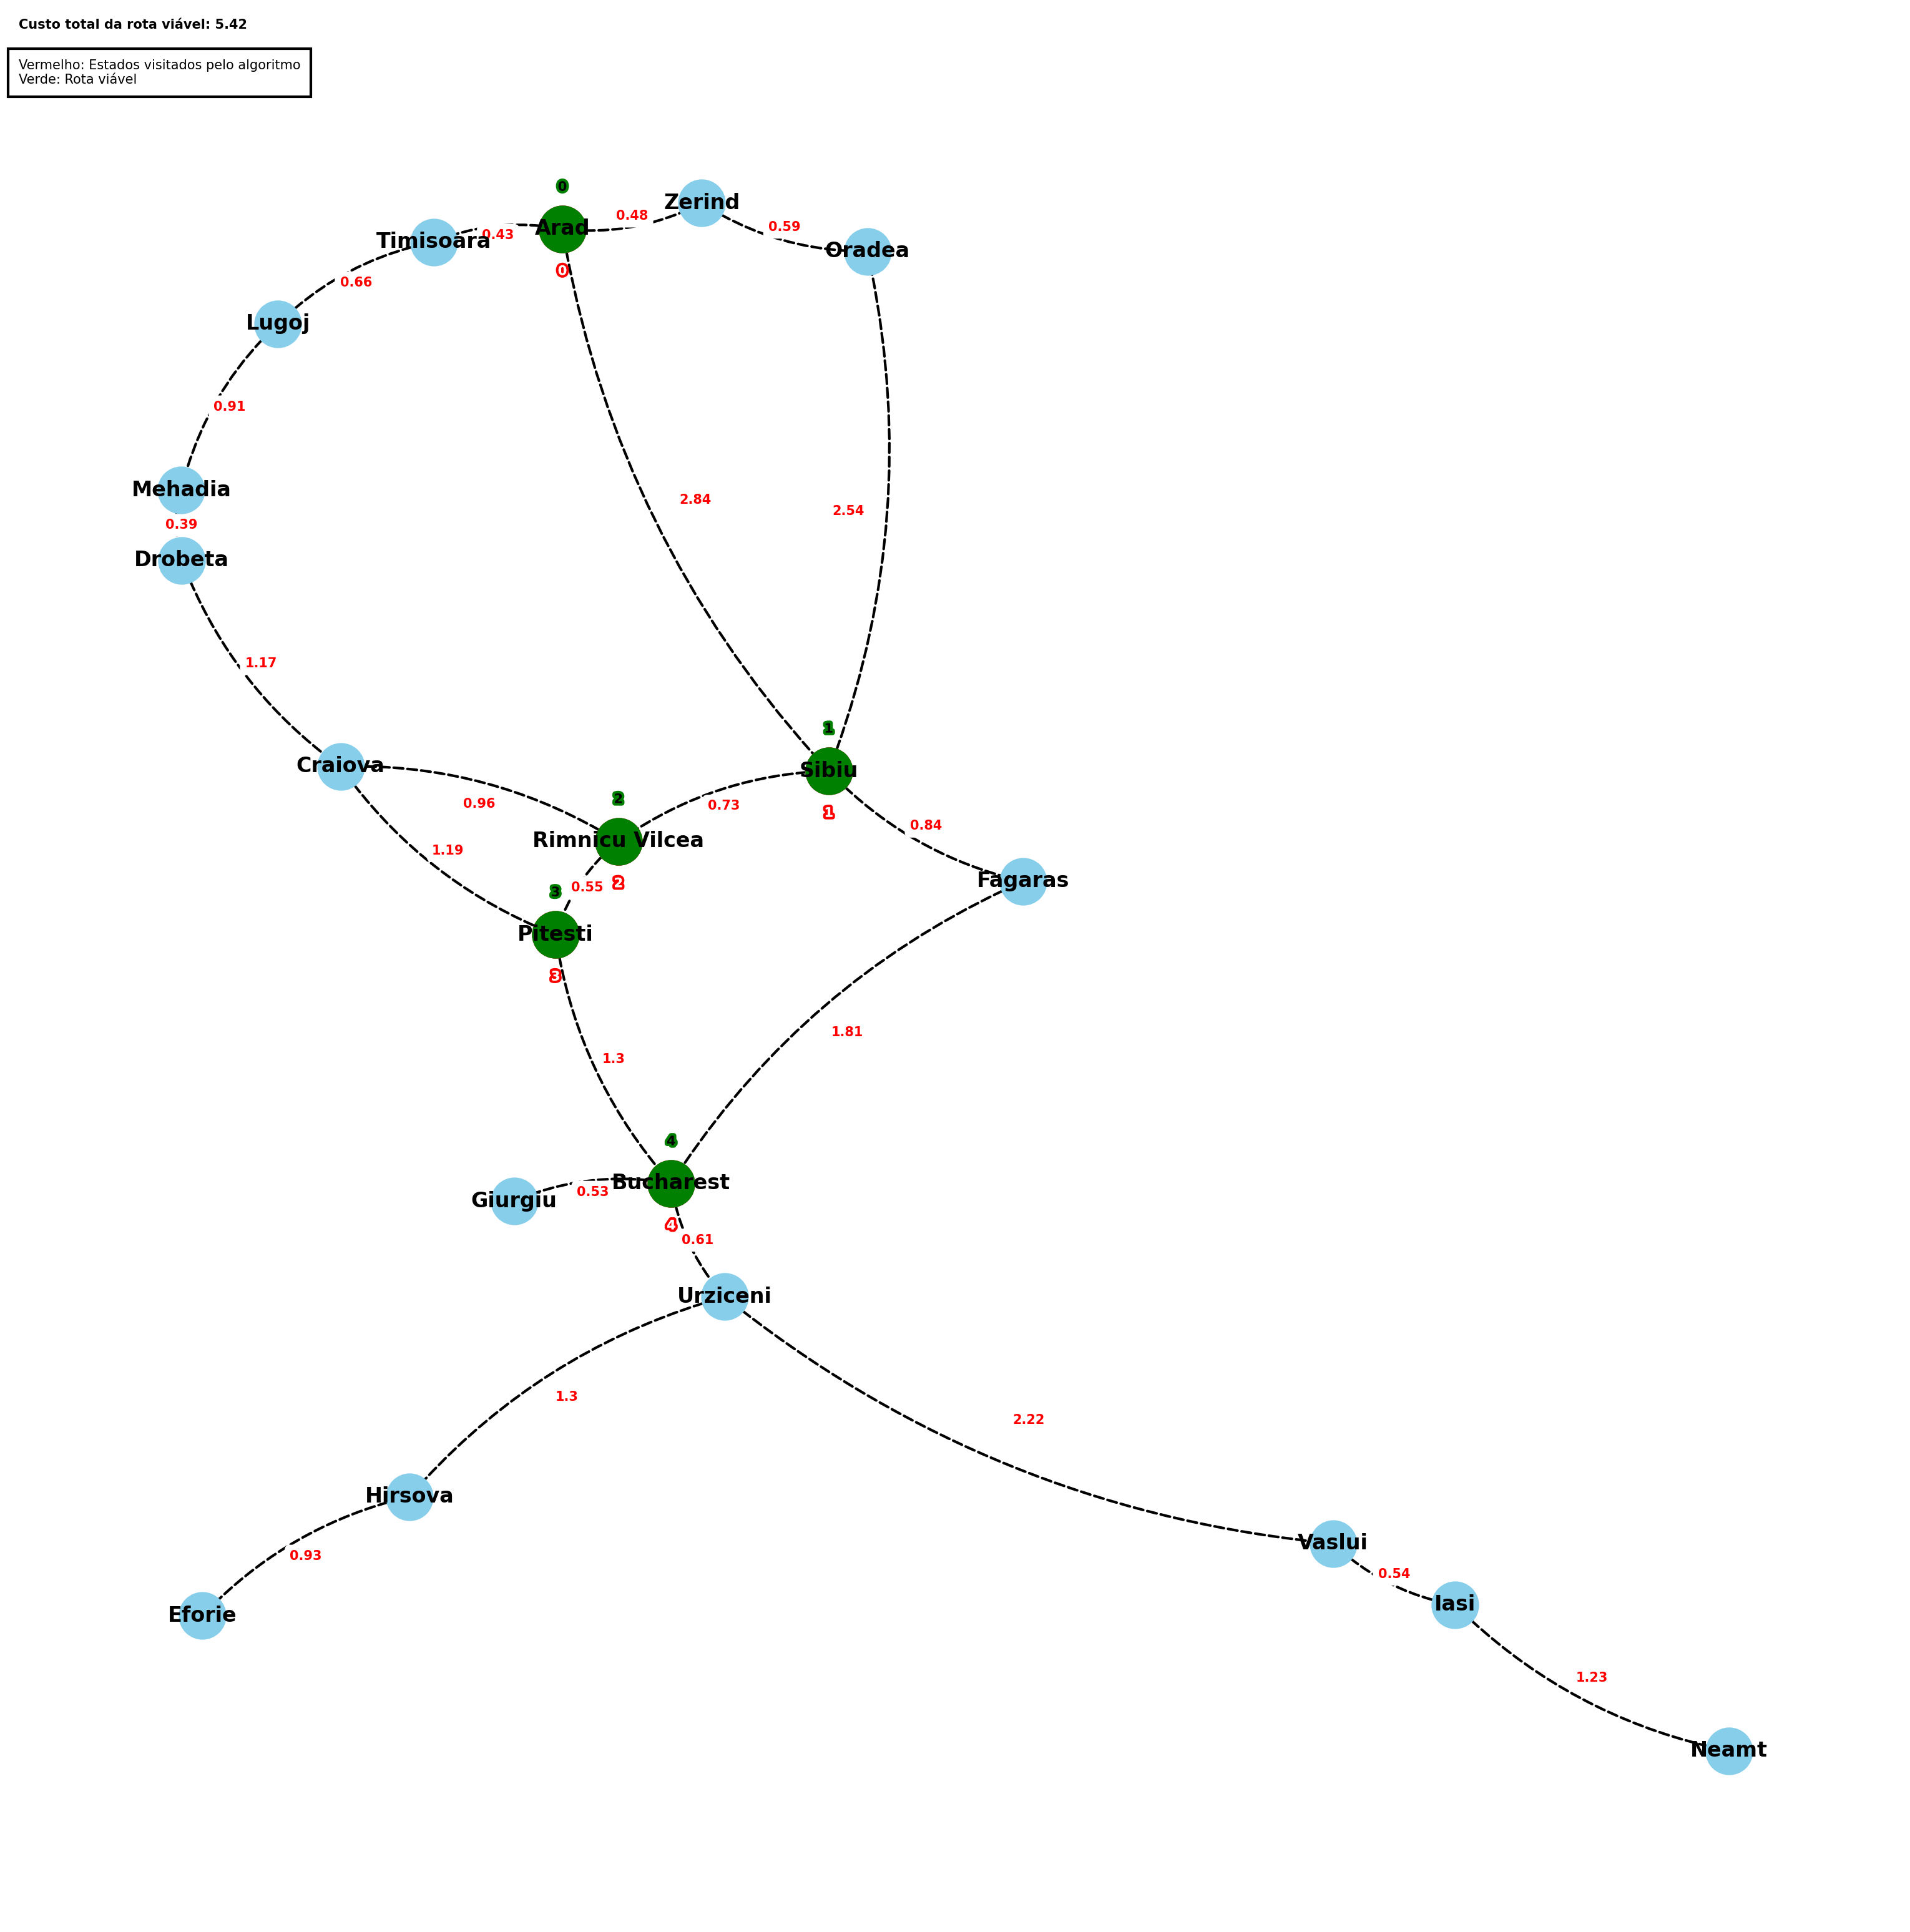

In [25]:
highlight_path(expanded, get_custo_total(viable_path), viable_path)

In [26]:
a_star_arad_neamt_path, a_star_arad_neamt_expanded, a_star_arad_neamt_distance, a_star_arad_neamt_viable_path = a_star_romenia("Arad", "Neamt", current_heuristic="Neamt")

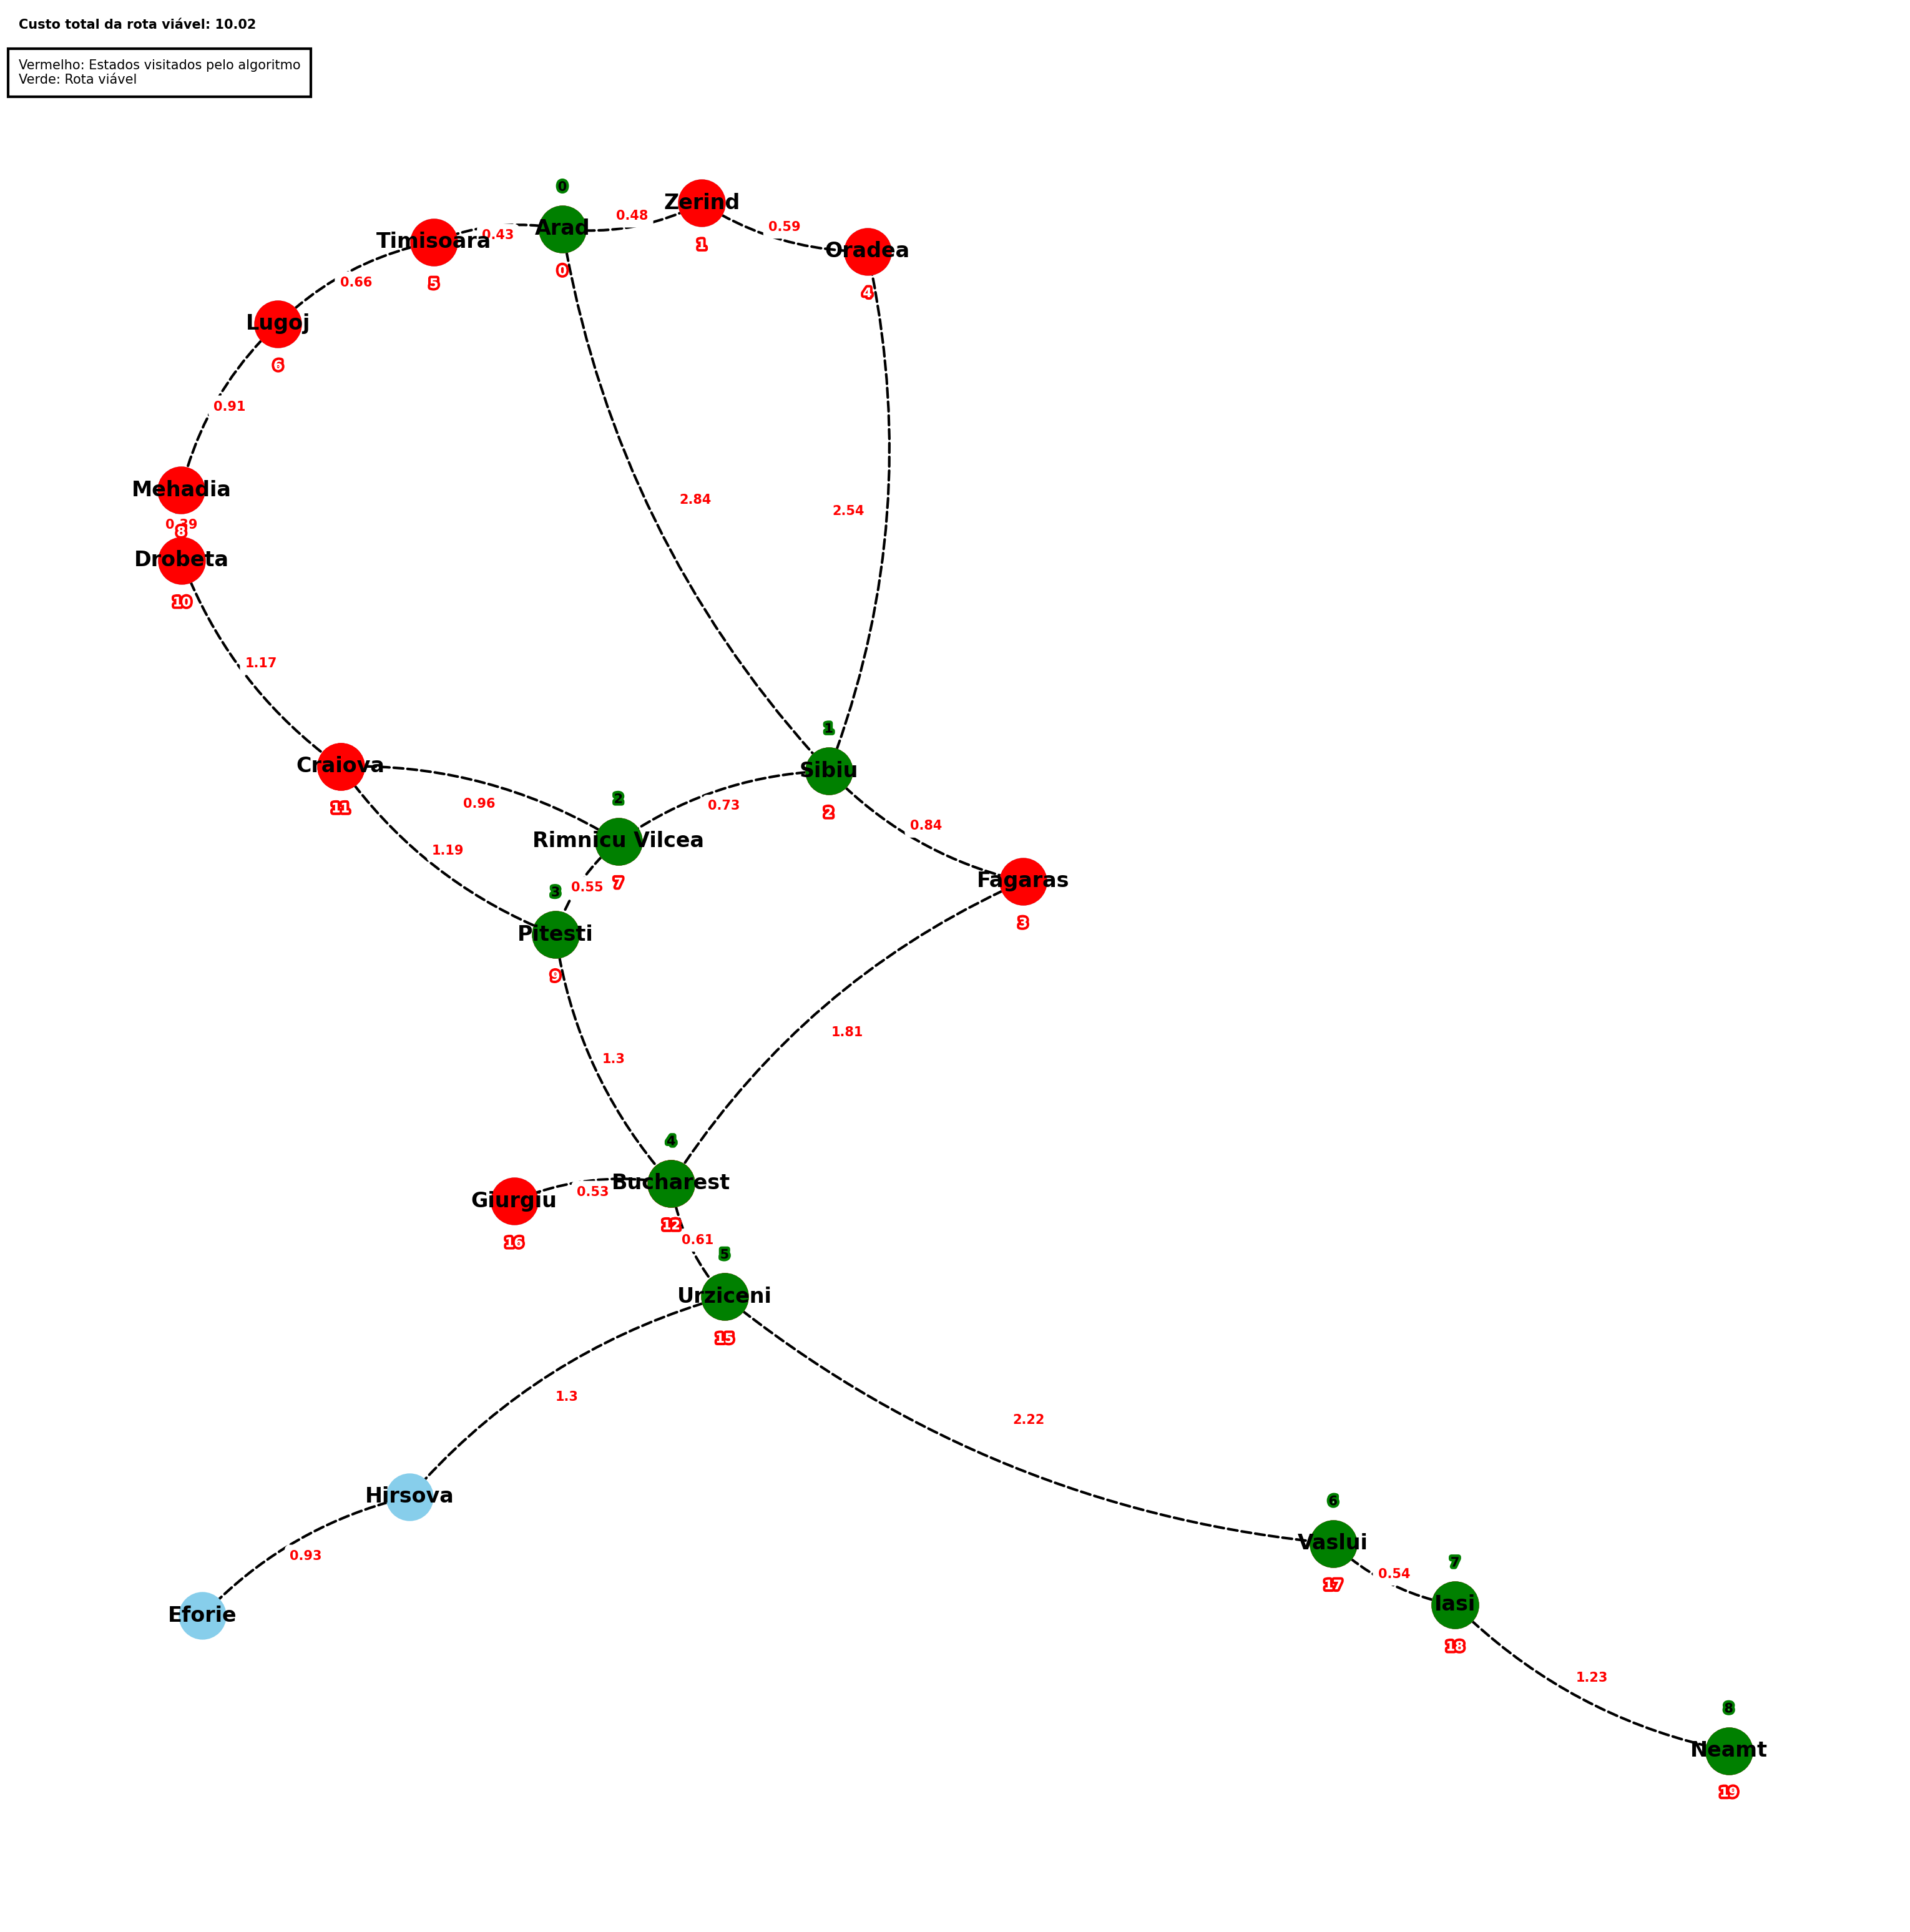

In [27]:
highlight_path(a_star_arad_neamt_expanded, get_custo_total(a_star_arad_neamt_viable_path), a_star_arad_neamt_viable_path)

In [28]:
a_star_giurgiu_eforie = a_star_romenia("Giurgiu", "Eforie", illustrate=True, current_heuristic="Neamt")

Cidade atual:  Giurgiu
Cidades expandidas:  ['Giurgiu']
Cidades na fila:  [(3.0893487062141434, 'Bucharest')]
Próxima cidade a ser expandida:  Bucharest
End of iteration


Cidade atual:  Bucharest
Cidades expandidas:  ['Giurgiu', 'Bucharest']
Cidades na fila:  [(3.2414298584535253, 'Urziceni'), (5.68027859771212, 'Pitesti'), (6.4158705376888525, 'Fagaras')]
Próxima cidade a ser expandida:  Urziceni
End of iteration


Cidade atual:  Urziceni
Cidades expandidas:  ['Giurgiu', 'Bucharest', 'Urziceni']
Cidades na fila:  [(3.379797446261695, 'Hirsova'), (5.68027859771212, 'Pitesti'), (6.095333884555965, 'Vaslui'), (6.4158705376888525, 'Fagaras')]
Próxima cidade a ser expandida:  Hirsova
End of iteration


Cidade atual:  Hirsova
Cidades expandidas:  ['Giurgiu', 'Bucharest', 'Urziceni', 'Hirsova']
Cidades na fila:  [(3.3700000000000006, 'Eforie'), (5.68027859771212, 'Pitesti'), (6.095333884555965, 'Vaslui'), (6.4158705376888525, 'Fagaras')]
Próxima cidade a ser expandida:  Eforie
End of iterat

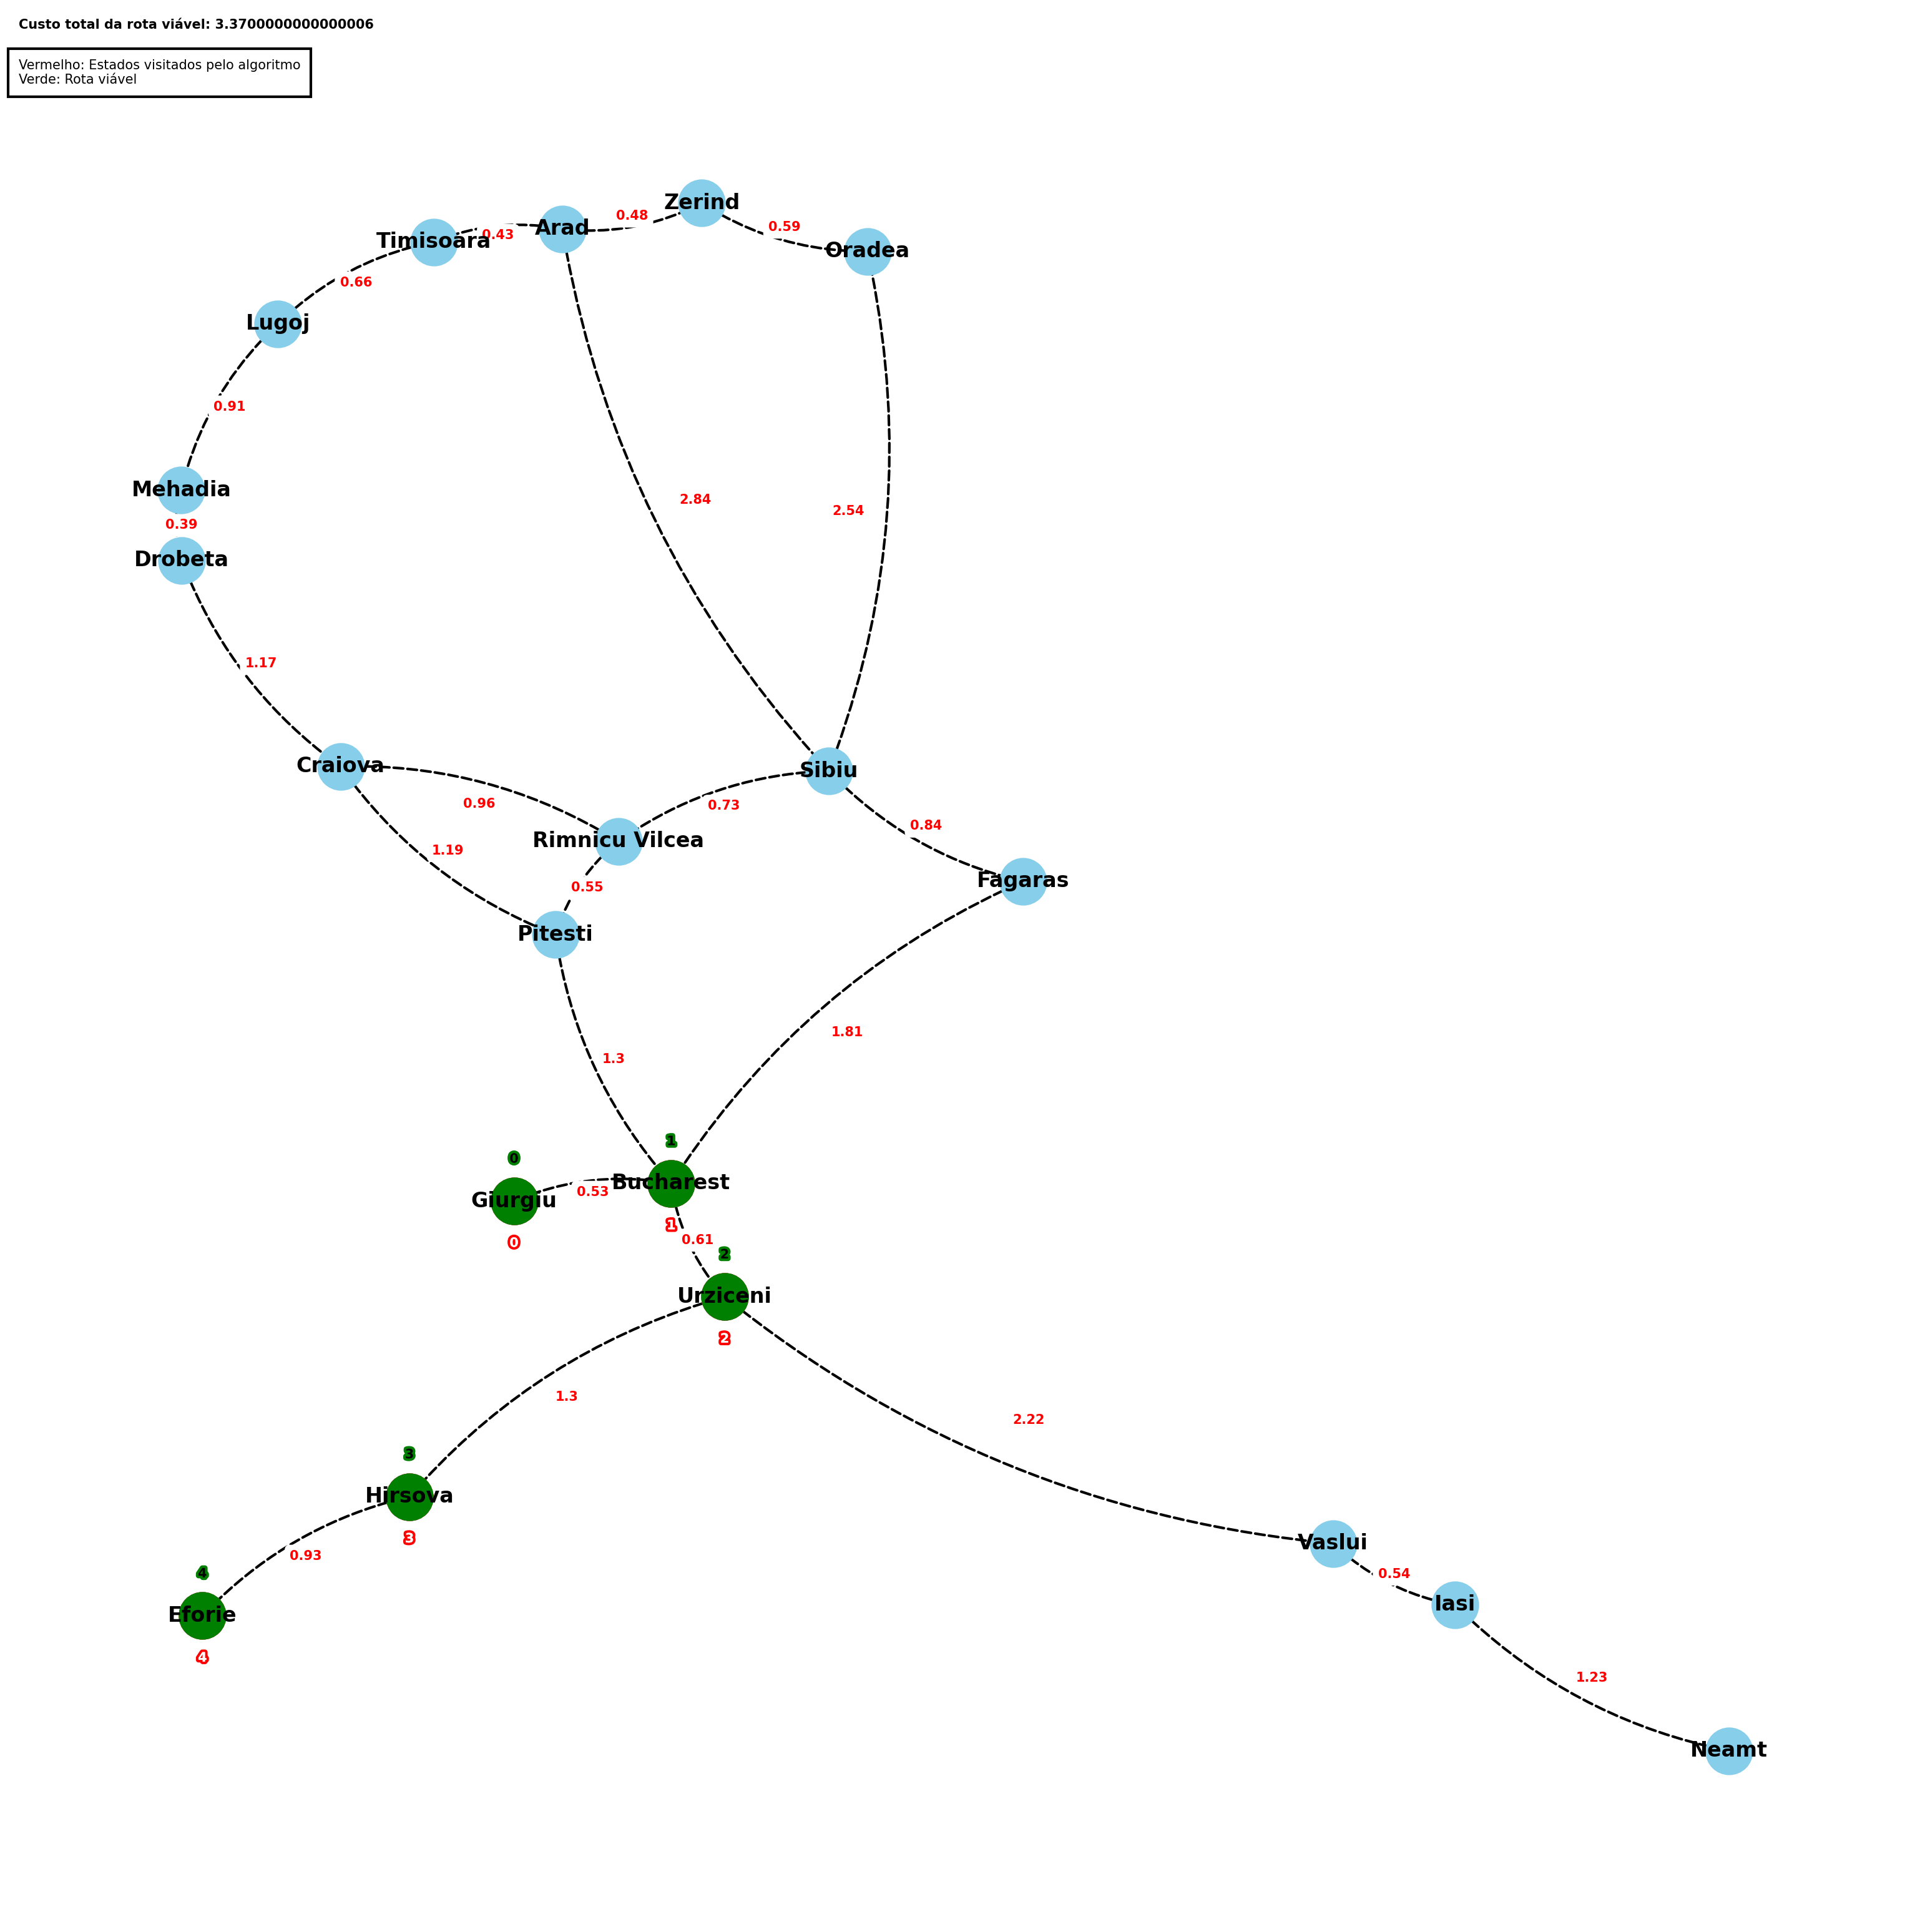

In [29]:
highlight_path(a_star_giurgiu_eforie[1], get_custo_total(a_star_giurgiu_eforie[3]), a_star_giurgiu_eforie[3])

<div class="alert alert-block alert-warning">
5. (Opcional) Resolva outro problema formulado como um problema de busca usando o
algoritmo A*. Pesquise sobre alguma função heurística para o problema, ou crie uma
heurística admissível para ele. Mostre o passo a passo da busca pela solução.
</div>

In [30]:
#já resolvido acima